##**Assignment 1**
##Basic Image Analysis Operations
####*Submitted by:* 
>> **_Usama Aleem Shami_**

>> _Reg. No. : **329894**_

>> _MSCS 2020_

####*Submitted to:* 
>> **_Dr. Muhammad Moazam Fraz_**

>> _Computer Vision (CS-867)_


In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importing my Helper Script Code from my Google Drive
%run "drive/My Drive/myHelperScript.py"

#To keep plots inline (within Notebook)
%matplotlib inline

In [3]:
# Location of my Images on My Google Drive
image_path = "drive/My Drive/images"
image_type = [".jpg",".png",".jpeg"]

#Reading *.jpg files from Dataset (by custom function)
imgJPG = loadImage(image_path,image_type[0])
print ("Total", image_type[0], "files in folder are", len(imgJPG))

#Reading *.png files from Dataset (by custom function)
imgPNG = loadImage(image_path,image_type[1])
print ("Total", image_type[1], "files in folder are", len(imgPNG))

#Reading *.jpeg files from Dataset (by custom function)
imgJPEG = loadImage(image_path,image_type[2])
print ("Total", image_type[2], "files in folder are", len(imgJPEG))

#Global List for paths of each image
global imgDir
imgDir = imgJPG + imgPNG + imgJPEG
print ("Total number of files is", len(imgDir))

Total .jpg files in folder are 6
Total .png files in folder are 1
Total .jpeg files in folder are 2
Total number of files is 9


##Task 2.1

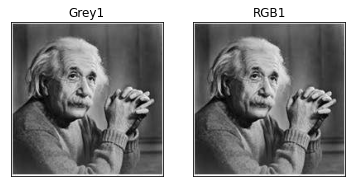

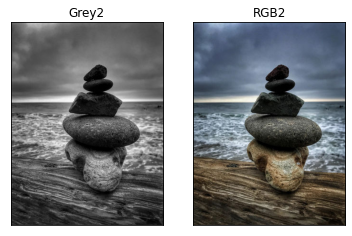

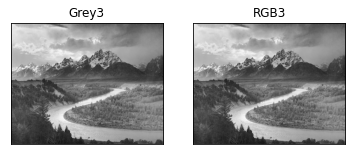

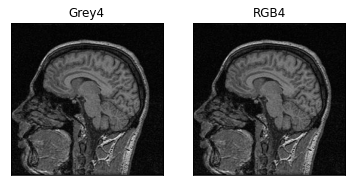

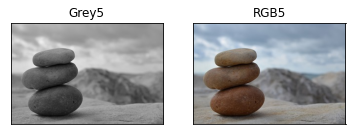

In [4]:
#Global List for Greyscale version of image
global imgGrey
imgGrey = []

#Global List for RGB version of each image
global imgRGB
imgRGB = []

#Storing RGB and Greyscale versions of each image in respective Lists
for i in range(0,len(imgDir)):
 iGrey = cv.imread(imgDir[i],0)
 imgGrey.append(iGrey)
 iRGB = cv.imread(imgDir[i],1)
 imgRGB.append(iRGB)

#Loop to Display Images (RGB + Grayscale) via Customized Diplay function
for i in range(0,5):
  displayTwoImages(imgGrey[i],imgRGB[i],'Grey'+ str(i+1),'RGB'+ str(i+1))

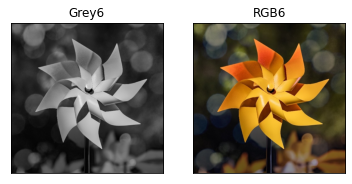

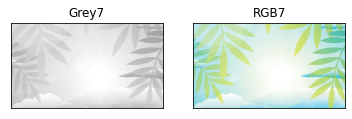

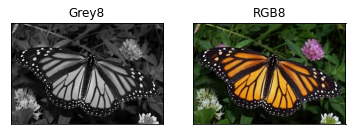

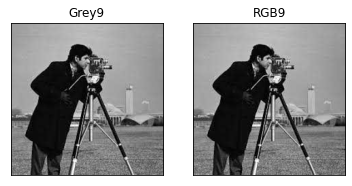

In [5]:
#Loop to Display Images (RGB + Grayscale) via Customized Diplay function (remaining images)
for i in range(5,len(imgDir)):
  displayTwoImages(imgGrey[i],imgRGB[i],'Grey'+ str(i+1),'RGB'+ str(i+1))

##Task 2.2

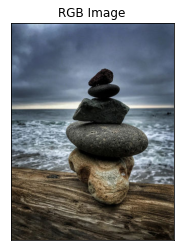

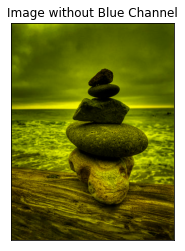

In [ ]:
#Displaying Images (before and after Channel Exclusion) via Customized functions
img = cv.imread(imgDir[1],1)
displayImage(img,"RGB Image")
imgNew = rgbEexclusion(img,0) #Passing 0 (for excluding Blue)
displayImage(imgNew,"Image without Blue Channel")

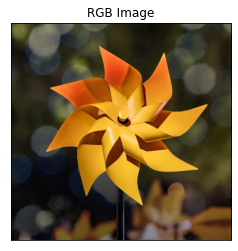

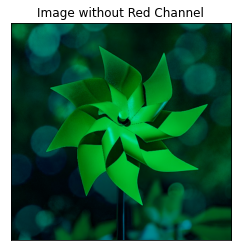

In [6]:
#Displaying Images (before and after Channel Exclusion) via Customized functions
img = cv.imread(imgDir[5],1)
displayImage(img,"RGB Image")
imgNew = rgbEexclusion(img,2) #Passing 2 (for excluding Red)
displayImage(imgNew,'Image without Red Channel')

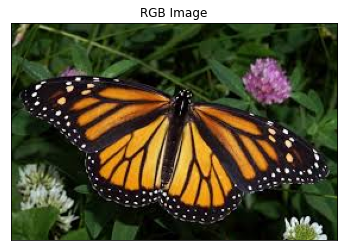

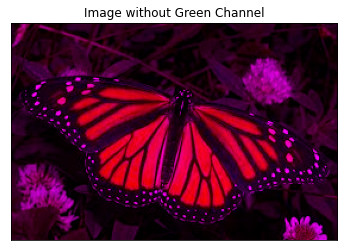

In [7]:
#Displaying Images (before and after Channel Exclusion) via Customized functions
img = cv.imread(imgDir[7],1)
displayImage(img,"RGB Image")
imgNew = rgbEexclusion(img,1) #Passing 1 (for excluding Green)
displayImage(imgNew,"Image without Green Channel")

##Task 2.3

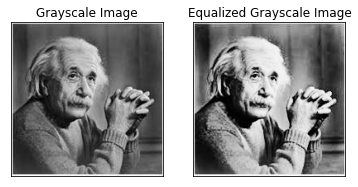

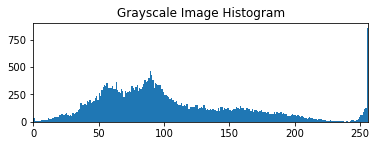

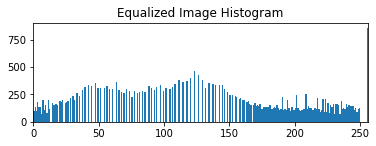

In [8]:
#Reading Image1 in Grayscale
imgOrg = cv.imread(imgDir[0],0)

#Applying Histogram Equalization
imgEquGrey = cv.equalizeHist(imgOrg)      

#Displaying Grayscale Image and Equalized Image 
displayTwoImages(imgOrg,imgEquGrey,"Grayscale Image","Equalized Grayscale Image")

plt.subplot(211)
plt.title("Grayscale Image Histogram")
plt.hist(imgOrg.flatten(),256,[0,256])     #Plotting Normal Histogram
plt.xlim([0,256])                          #Limiting x axis from 0 to 256
plt.show()

plt.subplot(212)
plt.title("Equalized Image Histogram")
plt.hist(imgEquGrey.flatten(),256,[0,256]) #Plotting Equalized Histogram
plt.xlim([0,256])                          #Limiting x axis from 0 to 256
plt.show()

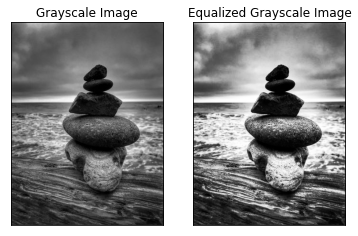

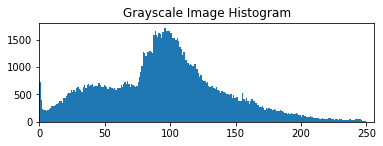

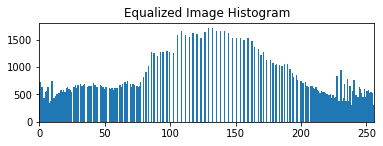

In [9]:
#Reading Image2 in Grayscale
imgOrg = cv.imread(imgDir[1],0)

#Applying Histogram Equalization
imgEquGrey = cv.equalizeHist(imgOrg)      

#Displaying Grayscale Image and Equalized Image 
displayTwoImages(imgOrg,imgEquGrey,"Grayscale Image","Equalized Grayscale Image")

plt.subplot(211)
plt.title("Grayscale Image Histogram")
plt.hist(imgOrg.flatten(),256,[0,256])     #Plotting Normal Histogram
plt.xlim([0,256])                          #Limiting x axis from 0 to 256
plt.show()

plt.subplot(212)
plt.title("Equalized Image Histogram")
plt.hist(imgEquGrey.flatten(),256,[0,256]) #Plotting Equalized Histogram
plt.xlim([0,256])                          #Limiting x axis from 0 to 256
plt.show()

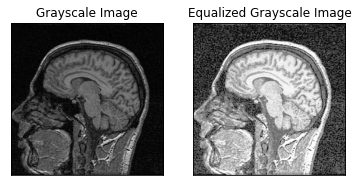

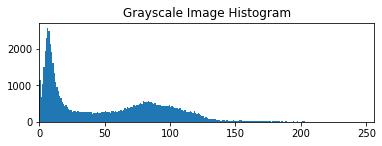

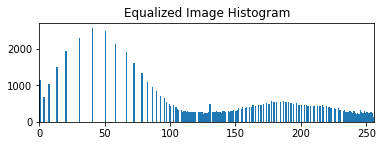

In [10]:
#Reading Image4 in Grayscale
imgOrg = cv.imread(imgDir[3],0)

#Applying Histogram Equalization
imgEquGrey = cv.equalizeHist(imgOrg)      

#Displaying Grayscale Image and Equalized Image 
displayTwoImages(imgOrg,imgEquGrey,"Grayscale Image","Equalized Grayscale Image")

plt.subplot(211)
plt.title("Grayscale Image Histogram")
plt.hist(imgOrg.flatten(),256,[0,256])     #Plotting Normal Histogram
plt.xlim([0,256])                          #Limiting x axis from 0 to 256
plt.show()

plt.subplot(212)
plt.title("Equalized Image Histogram")
plt.hist(imgEquGrey.flatten(),256,[0,256]) #Plotting Equalized Histogram
plt.xlim([0,256])                          #Limiting x axis from 0 to 256
plt.show()

##Task 2.4

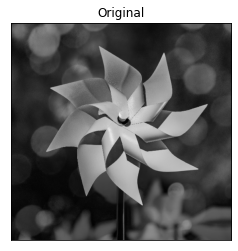

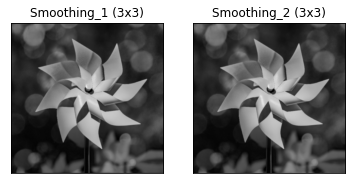

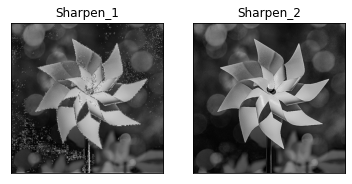

In [11]:
#Reading Image6 in Grayscale
img1 = cv.imread(imgDir[5],0)
displayImage(img1,"Original")

blurKernel = 1/9 * np.ones((3,3),np.float32)    #smoothing filter (3x3)
img_blur1 = myConv2D(img1,blurKernel)           #my function
img_blur2 = cv.filter2D(img1,-1,blurKernel)     #built-in function

displayTwoImages(img_blur1,img_blur2,"Smoothing_1 (3x3)","Smoothing_2 (3x3)")

#Sharpening filter coefficients obtained by Subtracting Original Image by Laplacian of Image
sharpenKernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
img_sharp1 = myConv2D(img1,sharpenKernel)       #my function
img_sharp2 = cv.filter2D(img1,-1,sharpenKernel) #built-in function

displayTwoImages(img_sharp1,img_sharp2 ,"Sharpen_1","Sharpen_2")

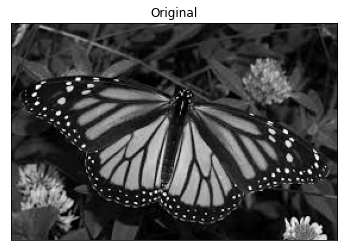

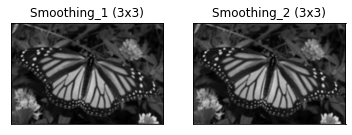

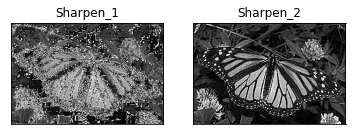

In [12]:
#Reading Image4 in Grayscale
img1 = cv.imread(imgDir[7],0)
displayImage(img1,"Original")

#Blurring/Smoothing/Box filter kernel 
blurKernel = 1/9 * np.ones((3,3),np.float32)    #smoothing filter (3x3)
img_blur1 = myConv2D(img1,blurKernel)           #my function
img_blur2 = cv.filter2D(img1,-1,blurKernel)     #built-in function

displayTwoImages(img_blur1,img_blur2,"Smoothing_1 (3x3)","Smoothing_2 (3x3)")

#Sharpening filter kernel (obtained by Subtracting Original Image by Laplacian of Image)
sharpenKernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
img_sharp1 = myConv2D(img1,sharpenKernel)       #my function
img_sharp2 = cv.filter2D(img1,-1,sharpenKernel) #built-in function

displayTwoImages(img_sharp1,img_sharp2,"Sharpen_1","Sharpen_2")

##Task 2.5

Part 1 and 2

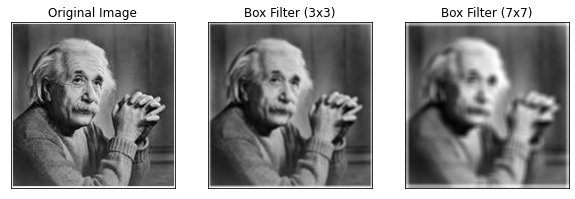

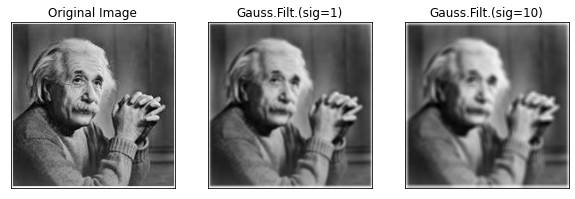

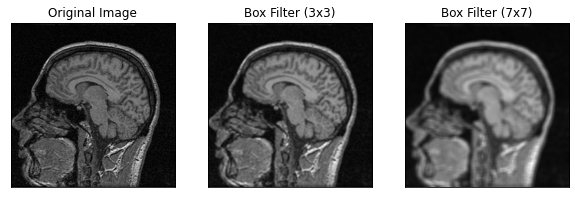

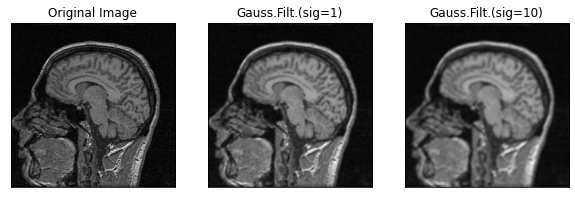

In [15]:
#Loop to fetch 2 images from Greyscale List
for i in range(0,6,3):
  img = imgGrey[i]

  #Box filtering
  FBox1 = 1/9 * np.ones((3,3),np.float32) #smoothing filter (3x3)
  FBox2 = 1/49 * np.ones((7,7),np.float32) #smoothing filter (7x7)

  imgBox1 = cv.filter2D(img,-1,FBox1)
  imgBox2 = cv.filter2D(img,-1,FBox2)
  
  #Gaussian filtering
  imgGauss1 = cv.GaussianBlur(img,(5,5),sigmaX = 1) #Gaussian filter (sigma=1)
  imgGauss2 = cv.GaussianBlur(img,(5,5),sigmaX = 10) #Gaussian filter (sigma=10)

  #Displaying results via Custom Function
  displayThreeImages(img,imgBox1,imgBox2,"Original Image","Box Filter (3x3)","Box Filter (7x7)")
  displayThreeImages(img,imgGauss1,imgGauss2,"Original Image","Gauss.Filt.(sig=1)","Gauss.Filt.(sig=10)")
  
  

Part 3 and 4

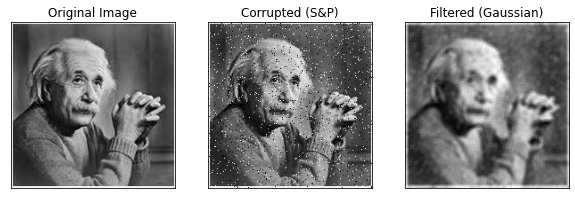

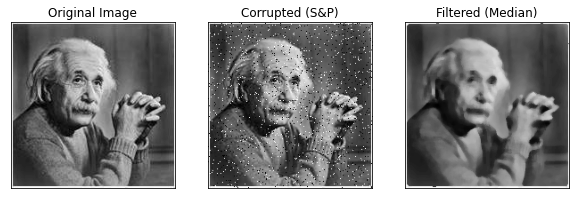

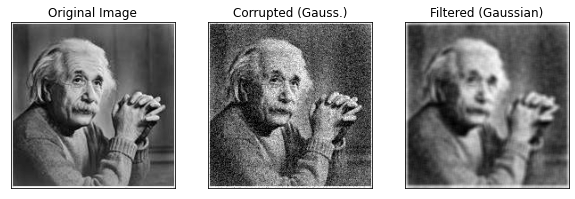

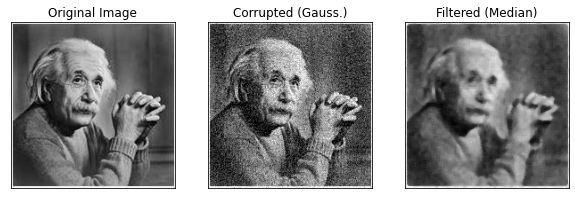

In [16]:
#Loop has been avoided since outputs were getting cropped in PDF
#Smaller window of figures are not visually appealing either

#for i in range(0,9,3):
#  img = imgGrey[i]

#Fetching 1st image from Greyscale Images List
img = imgGrey[0]

#Adding Gaussian noise
imgNoisyGauss = random_noise(img, mode='gaussian')
imgNoisyGauss = np.array(255*imgNoisyGauss, dtype = 'uint8')
  
#Adding Salt and Pepper noise
imgNoisySP = random_noise(img, mode='s&p')
imgNoisySP = np.array(255*imgNoisySP, dtype = 'uint8')
  
#Filtering Salt and Pepper noise by Gaussian and Median filter respectively
imgSP_FiltGauss = cv.GaussianBlur(imgNoisySP,(5,5),sigmaX = 10)
imgSP_FiltMedian = cv.medianBlur(imgNoisySP,5)

#Filtering Gaussian noise by Gaussian and Median filter respectively
imgGauss_FiltGauss = cv.GaussianBlur(imgNoisyGauss,(5,5),sigmaX = 10)
imgGauss_FiltMedian = cv.medianBlur(imgNoisyGauss,5)

#Displaying results via Custom Function
displayThreeImages(img,imgNoisySP,imgSP_FiltGauss,"Original Image","Corrupted (S&P)","Filtered (Gaussian)")
displayThreeImages(img,imgNoisySP,imgSP_FiltMedian,"Original Image","Corrupted (S&P)","Filtered (Median)")
displayThreeImages(img,imgNoisyGauss,imgGauss_FiltGauss,"Original Image","Corrupted (Gauss.)","Filtered (Gaussian)")
displayThreeImages(img,imgNoisyGauss,imgGauss_FiltMedian,"Original Image","Corrupted (Gauss.)","Filtered (Median)")


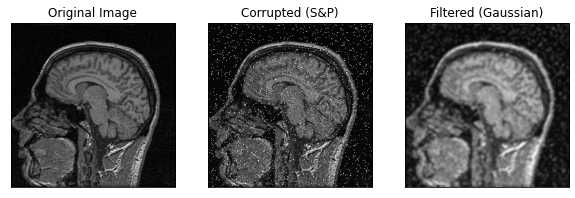

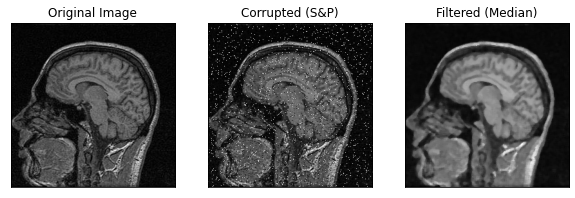

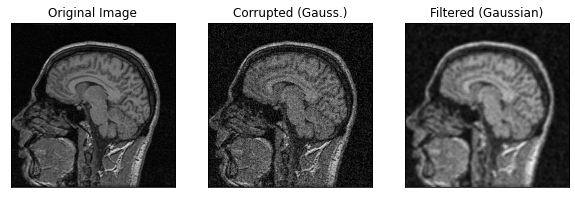

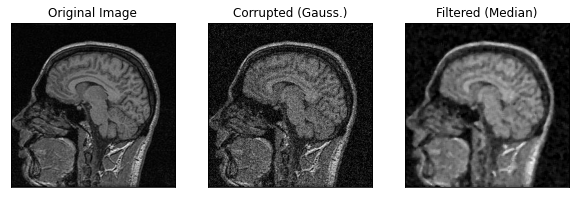

In [17]:
#Fetching 4th image from Greyscale List

img = imgGrey[3]

#Adding Gaussian noise
imgNoisyGauss = random_noise(img, mode='gaussian')
imgNoisyGauss = np.array(255*imgNoisyGauss,dtype = 'uint8')
  
#Adding Salt and Pepper noise
imgNoisySP = random_noise(img, mode='s&p')
imgNoisySP = np.array(255*imgNoisySP,dtype = 'uint8')
  
#Filtering Salt and Pepper noise by Gaussian and Median filter respectively
imgSP_FiltGauss = cv.GaussianBlur(imgNoisySP,(5,5),sigmaX = 10)
imgSP_FiltMedian = cv.medianBlur(imgNoisySP,5)

#Filtering Gaussian noise by Gaussian and Median filter respectively
imgGauss_FiltGauss = cv.GaussianBlur(imgNoisyGauss,(5,5),sigmaX = 10)
imgGauss_FiltMedian = cv.medianBlur(imgNoisyGauss,5)

#Displaying results via Custom Function
displayThreeImages(img,imgNoisySP,imgSP_FiltGauss,"Original Image","Corrupted (S&P)","Filtered (Gaussian)")
displayThreeImages(img,imgNoisySP,imgSP_FiltMedian,"Original Image","Corrupted (S&P)","Filtered (Median)")
displayThreeImages(img,imgNoisyGauss,imgGauss_FiltGauss,"Original Image","Corrupted (Gauss.)","Filtered (Gaussian)")
displayThreeImages(img,imgNoisyGauss,imgGauss_FiltMedian,"Original Image","Corrupted (Gauss.)","Filtered (Median)")


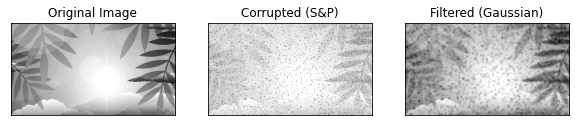

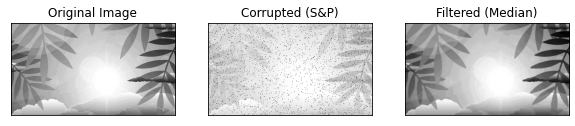

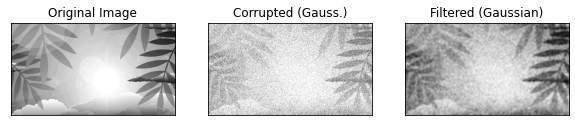

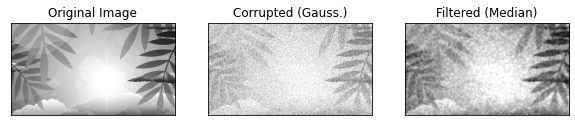

In [18]:
#Fetching 7th image from Greyscale List

img = imgGrey[6]

#Adding Gaussian noise
imgNoisyGauss = random_noise(img, mode='gaussian')
imgNoisyGauss = np.array(255*imgNoisyGauss,dtype = 'uint8')
  
#Adding Salt and Pepper noise
imgNoisySP = random_noise(img, mode='s&p')
imgNoisySP = np.array(255*imgNoisySP,dtype = 'uint8')
  
#Filtering Salt and Pepper noise by Gaussian and Median filter respectively
imgSP_FiltGauss = cv.GaussianBlur(imgNoisySP,(5,5),sigmaX = 10)
imgSP_FiltMedian = cv.medianBlur(imgNoisySP,5)

#Filtering Gaussian noise by Gaussian and Median filter respectively
imgGauss_FiltGauss = cv.GaussianBlur(imgNoisyGauss,(5,5),sigmaX = 10)
imgGauss_FiltMedian = cv.medianBlur(imgNoisyGauss,5)

#Displaying results via Custom Function
displayThreeImages(img,imgNoisySP,imgSP_FiltGauss,"Original Image","Corrupted (S&P)","Filtered (Gaussian)")
displayThreeImages(img,imgNoisySP,imgSP_FiltMedian,"Original Image","Corrupted (S&P)","Filtered (Median)")
displayThreeImages(img,imgNoisyGauss,imgGauss_FiltGauss,"Original Image","Corrupted (Gauss.)","Filtered (Gaussian)")
displayThreeImages(img,imgNoisyGauss,imgGauss_FiltMedian,"Original Image","Corrupted (Gauss.)","Filtered (Median)")


Part 5

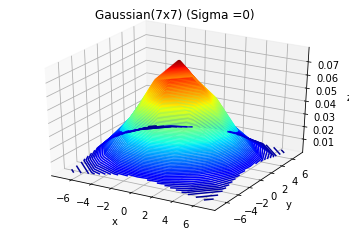

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


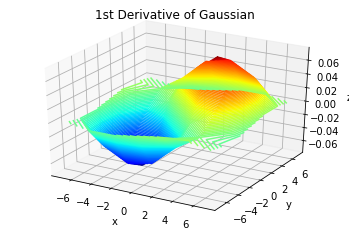

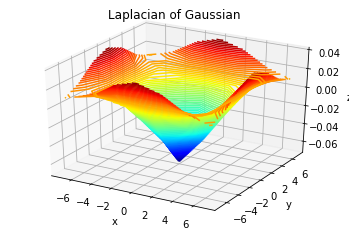

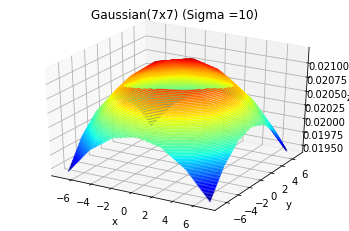

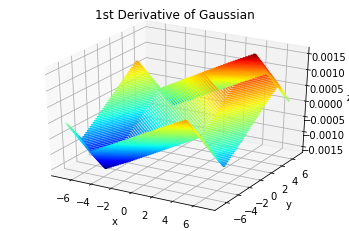

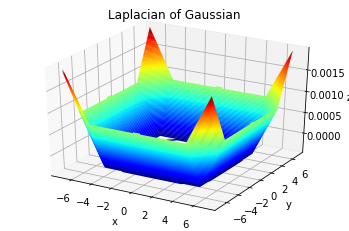

In [19]:
ksize = 7 #kernel size for Gaussian
min = 0   #minimum value for sigma
max = 10  #maximum value for sigma

#Loop to compute Gaussian (and others) keeping Sigma as Min and Max respectively
for sigma in range(min,max+1,max):
  
  #Computing 2D Gaussian filter
  Gauss = cv.getGaussianKernel(ksize, sigma)
  kernelGauss = np.outer(Gauss, Gauss.transpose())
  
  #Computing 1st Derivative of Gaussian (by Gx and Gy)
  Dx = np.array([+1,0,-1])
  Gx = cv.filter2D(kernelGauss,-1,Dx)
  Gy = Gx.transpose()
  kernalDer = Gx + Gy

  #Computing Laplace of Gaussian
  kernelLaplace = cv.Laplacian(kernelGauss,cv.CV_64F)

  #Function for 3D Contour Plots of Kernels
  kernel3dPlot(kernelGauss,'Gaussian('+str(ksize)+'x'+str(ksize)+') (Sigma ='+ str(sigma) +')',100,'jet')
  kernel3dPlot(kernalDer,'1st Derivative of Gaussian',100,'jet')
  kernel3dPlot(kernelLaplace,'Laplacian of Gaussian',100,'jet')


##Task 2.6

**Part 1** (Gradient Magnitude)

In this part we can conclude that: 

*Increasing Value of Scale will make the detected edges  more prominent.*

*Also, increasing Kernel Size (for Gaussian Filter) will make the detected edge thicker and less sharp leading to blurriness.*

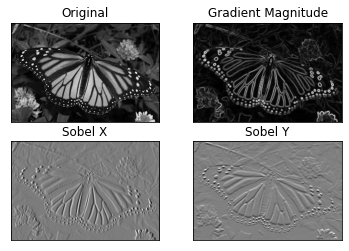

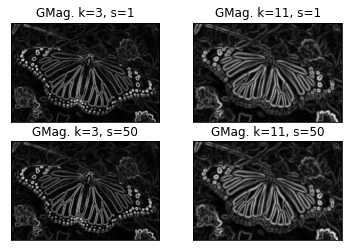

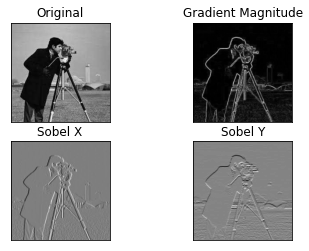

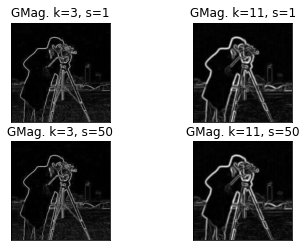

In [20]:
#Sobel Operator

#Loop to fetch 2 images from Greyscale List
for i in range(7,9):
  img = imgGrey[i]

  #Computing Gradient Magnitude from Gradients (x and y)
  Gx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize =3 , scale = 1) #(xorder=1, yorder=0) for Gx
  Gy = cv.Sobel(img, cv.CV_64F, 0, 1, ksize =3 , scale = 1) #(xorder=0, yorder=1) for Gy
  GMag = (Gx**2 + Gy**2)**0.5

  #Plotting Images in 2x2 subplot
  plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
  plt.title('Original'), plt.xticks([]), plt.yticks([])
  plt.subplot(2,2,2),plt.imshow(GMag,cmap = 'gray')
  plt.title('Gradient Magnitude'), plt.xticks([]), plt.yticks([])
  plt.subplot(2,2,3),plt.imshow(Gx,cmap = 'gray')
  plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
  plt.subplot(2,2,4),plt.imshow(Gy,cmap = 'gray')
  plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
  plt.show()

  #Computing Gradient Magnitudes from Gradients (x and y) by varying parameters (scale and kernel size)
  Gx1 = cv.Sobel(img, cv.CV_64F, 1, 0, ksize =11 , scale = 1)
  Gy1 = cv.Sobel(img, cv.CV_64F, 0, 1, ksize =11 , scale = 1)
  GMag1 = (Gx1**2 + Gy1**2)**0.5

  Gx2 = cv.Sobel(img, cv.CV_64F, 1, 0, ksize =3 , scale = 50)
  Gy2 = cv.Sobel(img, cv.CV_64F, 0, 1, ksize =3 , scale = 50)
  GMag2 = (Gx2**2 + Gy2**2)**0.5

  Gx3 = cv.Sobel(img, cv.CV_64F, 1, 0, ksize =11 , scale = 50)
  Gy3 = cv.Sobel(img, cv.CV_64F, 0, 1, ksize =11 , scale = 50)
  GMag3 = (Gx3**2 + Gy3**2)**0.5

  #Plotting Images in 2x2 subplot
  plt.subplot(2,2,1),plt.imshow(GMag,cmap = 'gray')
  plt.title('GMag. k=3, s=1'), plt.xticks([]), plt.yticks([])
  plt.subplot(2,2,2),plt.imshow(GMag1,cmap = 'gray')
  plt.title('GMag. k=11, s=1'), plt.xticks([]), plt.yticks([])
  plt.subplot(2,2,3),plt.imshow(GMag2,cmap = 'gray')
  plt.title('GMag. k=3, s=50'), plt.xticks([]), plt.yticks([])
  plt.subplot(2,2,4),plt.imshow(GMag3,cmap = 'gray')
  plt.title('GMag. k=11, s=50'), plt.xticks([]), plt.yticks([])
  plt.show()

**Part 2** (Laplacian of Gaussian)

In this part we can conclude that: 

*Setting Small Values of Sigma will help in fine detection of edges. Increasing the value of Sigma will make the detected edge blurry.*

*Also, increasing Kernel Size (for Gaussian Filter) will make the edge less sharp leading to blurriness.*


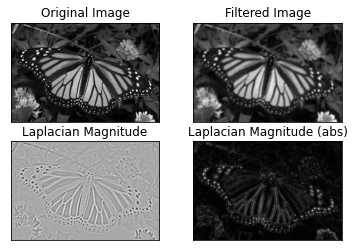

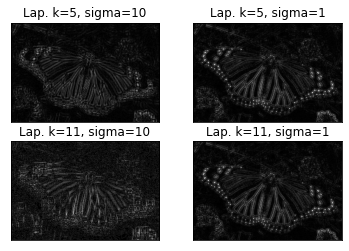

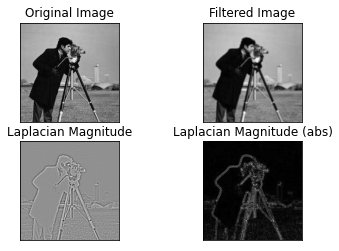

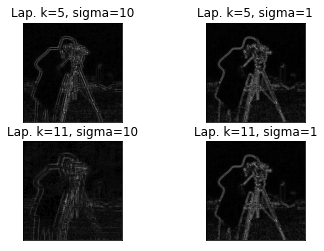

In [21]:
#Laplacian of Gaussian

#Loop to fetch 2 images from Greyscale List
for i in range(7,9):
  img = imgGrey[i]

  #Computing Magnitude of Laplacian of Gaussian
  imgGauss = cv.GaussianBlur(img,(5,5),sigmaX = 1) #Applying Gaussian Blur
  imgLap = cv.Laplacian(imgGauss,cv.CV_64F)        #Applying Laplacian

  #Plotting Images in 2x2 subplot
  plt.subplot(2,2,1),plt.imshow(img,cmap= 'gray')
  plt.title("Original Image"), plt.xticks([]), plt.yticks([])
  plt.subplot(2,2,2),plt.imshow(imgGauss,cmap = 'gray')
  plt.title("Filtered Image"), plt.xticks([]), plt.yticks([])
  plt.subplot(2,2,3),plt.imshow(imgLap,cmap = 'gray')
  plt.title("Laplacian Magnitude"), plt.xticks([]), plt.yticks([])
  plt.subplot(2,2,4),plt.imshow(np.absolute(imgLap),cmap = 'gray')
  plt.title("Laplacian Magnitude (abs)"), plt.xticks([]), plt.yticks([])
  plt.show()

  #Computing Magnitude of Laplacian of Gaussian by varying Parameters (sigma and kernel size)
  imgGauss1 = cv.GaussianBlur(img,(5,5),sigmaX = 10)
  imgLap1 = cv.Laplacian(imgGauss1,cv.CV_64F)

  imgGauss2 = cv.GaussianBlur(img,(5,5),sigmaX = 1)
  imgLap2 = cv.Laplacian(imgGauss2,cv.CV_64F)

  imgGauss3 = cv.GaussianBlur(img,(11,11),sigmaX = 10)
  imgLap3 = cv.Laplacian(imgGauss3,cv.CV_64F)

  imgGauss4 = cv.GaussianBlur(img,(11,11),sigmaX = 1)
  imgLap4 = cv.Laplacian(imgGauss4,cv.CV_64F)


  #Plotting Laplacian Magnitudes in 2x2 subplot
  # k = kernel size | sigma = sigmaX = sigmaY
  plt.subplot(2,2,1),plt.imshow(np.absolute(imgLap1),cmap = 'gray')
  plt.title('Lap. k=5, sigma=10'), plt.xticks([]), plt.yticks([])
  plt.subplot(2,2,2),plt.imshow(np.absolute(imgLap2),cmap = 'gray')
  plt.title('Lap. k=5, sigma=1'), plt.xticks([]), plt.yticks([])
  plt.subplot(2,2,3),plt.imshow(np.absolute(imgLap3),cmap = 'gray')
  plt.title('Lap. k=11, sigma=10'), plt.xticks([]), plt.yticks([])
  plt.subplot(2,2,4),plt.imshow(np.absolute(imgLap4),cmap = 'gray')
  plt.title('Lap. k=11, sigma=1'), plt.xticks([]), plt.yticks([])
  plt.show()

**Part 3** (Canny Edge Detector)

In this part we can conclude that setting Small Values of both threshold will help in detecting edges which are less prominent in images compared to background, whereas setting Larger Values will detect only prominent edges, so:

*The choice of threshold values selection depends completely on the nature of the image*

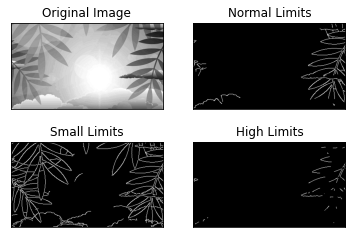

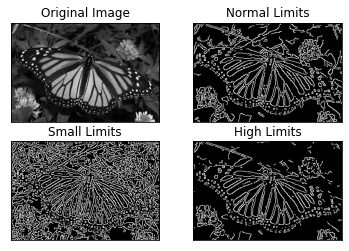

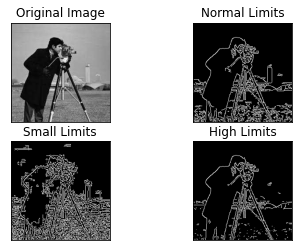

In [22]:
#Canny Edge Detector

#Loop to fetch 2 images from Greyscale List
for i in range(6,9):
  img = imgGrey[i]

  #Applying Canny Edge Detector by varying threshold limits
  # first value = lower/1st threshold | second value = higher/2nd threshold
  imgCanny1 = cv.Canny(img,100,200) #lower threshold is 0.5 times the higher threshold
  imgCanny2 = cv.Canny(img,20,40)
  imgCanny3 = cv.Canny(img,200,250)

  #Plotting Final Images in 2x2 subplot
  plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
  plt.title('Original Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(2,2,2),plt.imshow(imgCanny1,cmap = 'gray')
  plt.title('Normal Limits'), plt.xticks([]), plt.yticks([])
  plt.subplot(2,2,3),plt.imshow(imgCanny2,cmap = 'gray')
  plt.title('Small Limits'), plt.xticks([]), plt.yticks([])
  plt.subplot(2,2,4),plt.imshow(imgCanny3,cmap = 'gray')
  plt.title('High Limits'), plt.xticks([]), plt.yticks([])
  plt.show()
